In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

PREPROCESSION

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 16 14:37:29 2020

@author: Janani Pradeep
"""
# Data Preprocessing




df=pd.read_csv('master.csv')
array = df.values
x=array[:, 5:8] #population, gdp_for_year ($) ,gdp_per_capita ($)
y=array[: ,8:] #suicides_no,suicides/100k pop
w=array[: ,1] #sex

#to fill any missing values with mean
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(fill_value=np.nan, strategy='mean')
missing=imputer.fit_transform(x)
print(missing[0:5,:])

#to scale the population, gdp_for_year ($) ,gdp_per_capita ($) using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1000))
rescaled=scaler.fit_transform(x)
np.set_printoptions(precision=3)
print(rescaled[0:5,:])

#encoding data
age_coder = {'5-14 years':0,
            '15-24 years':1,
            '25-34 years':2,
            '35-54 years':3,
            '55-74 years':4,
            '75+ years':5}
gender_coder = {'female':0,'male':1}



#encoder=ce.sum_coding.SumEncoder(cols='country',verbose=False)
df['age_encoder'] = df['age'].map(age_coder)
df['sex_encoder'] = df['sex'].map(gender_coder)
del df['age']
del df['sex']



cols = list(df.columns.values)
cols = cols[0:1]+cols[-2:] + cols[1:-2]
df=df[cols]

df.head()

df.to_csv('copy_master.csv', index = False, header=True)

df=pd.read_csv('copy_master.csv')
df.head()

[[3.1290000e+05 2.1566249e+09 7.9600000e+02]
 [3.0800000e+05 2.1566249e+09 7.9600000e+02]
 [2.8970000e+05 2.1566249e+09 7.9600000e+02]
 [2.1800000e+04 2.1566249e+09 7.9600000e+02]
 [2.7430000e+05 2.1566249e+09 7.9600000e+02]]
[[7.137 0.116 4.322]
 [7.025 0.116 4.322]
 [6.607 0.116 4.322]
 [0.491 0.116 4.322]
 [6.256 0.116 4.322]]


,country,age_encoder,sex_encoder,country-year,year,population,gdp_for_year ($),gdp_per_capita ($),suicides_no,suicides/100k pop
0,Albania,1,1,Albania1987,1987,312900,2.156625e+09,796,21,6.71
1,Albania,3,1,Albania1987,1987,308000,2.156625e+09,796,16,5.19
2,Albania,1,0,Albania1987,1987,289700,2.156625e+09,796,14,4.83
3,Albania,5,1,Albania1987,1987,21800,2.156625e+09,796,1,4.59
4,Albania,2,1,Albania1987,1987,274300,2.156625e+09,796,9,3.28


AGE WISE SUICIDE TREND

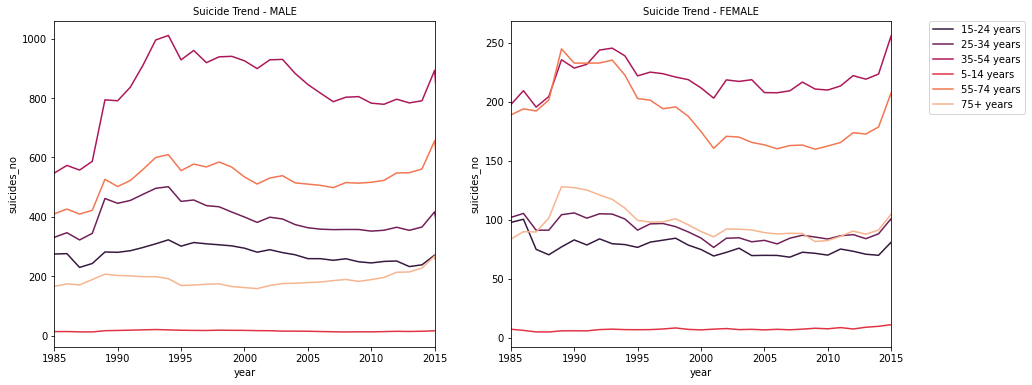

In [ ]:
# DATA Visualization


df=pd.read_csv('master.csv')
df_sort =  df.sort_values(by='age')  # sort by age

df_sort =  df.sort_values(by='age')
fig = plt.figure(figsize=(15,6))
fig.add_subplot(121)
plt.title('Suicide Trend - MALE', fontsize=10)
plt.xlim(1985,2015)
b=sns.lineplot(data=df_sort[df_sort['sex'] == 'male'], x='year',y='suicides_no',hue='age',ci=None,legend=0,palette='rocket')


b.set_xlabel("year",fontsize=10)
b.set_ylabel("suicides_no",fontsize=10)
b.tick_params(labelsize=10)
fig.add_subplot(122)
plt.title('Suicide Trend - FEMALE', fontsize=10)
plt.xlim(1985,2015)
b=sns.lineplot(data=df_sort[df_sort['sex'] == 'female'], x='year',y='suicides_no',hue='age',ci=None,palette='rocket')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
b.set_xlabel("year",fontsize=10)
b.set_ylabel("suicides_no",fontsize=10)
b.tick_params(labelsize=10)
plt.show()

GENDER WISE SUICIDES

Text(0, 0.5, 'Number of Suicide')

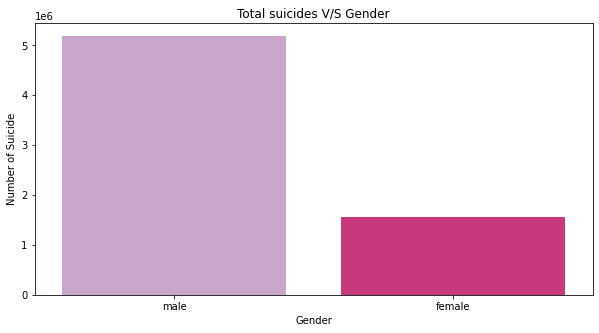

In [ ]:

plt.figure(figsize=(10,5))
x=df["sex"]
y=df["suicides_no"]
sucide_sgen = pd.DataFrame(df['suicides_no'].groupby(df['sex']).sum().reset_index().sort_values(by='suicides_no', ascending=False))

x=sucide_sgen["sex"]
y= sucide_sgen['suicides_no']
sns.barplot(x=x, y=y,palette=("PuRd"))
plt.title("Total suicides V/S Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Suicide")

SUICIDE/100K V/S AGE

Text(0, 0.5, 'Number of Suicide/100k population')

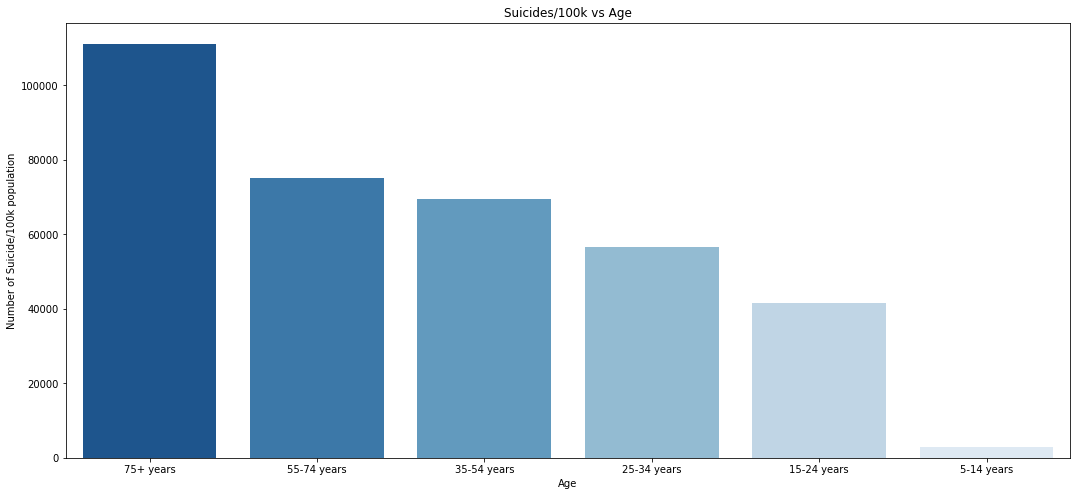

In [ ]:
plt.figure(figsize=(18,8))
x=df["age"]
y=df["suicides/100k pop"]
sucide_sgen = pd.DataFrame(df['suicides/100k pop'].groupby(df['age']).sum().reset_index().sort_values(by='suicides/100k pop', ascending=False))
x=sucide_sgen["age"]
y= sucide_sgen['suicides/100k pop']
sns.barplot(x=x, y=y,palette=("Blues_r"))
plt.title("Suicides/100k vs Age")
plt.xlabel("Age")
plt.ylabel("Number of Suicide/100k population")

COUNTRY WISE SUICIDES

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text major ticklabel objects>)

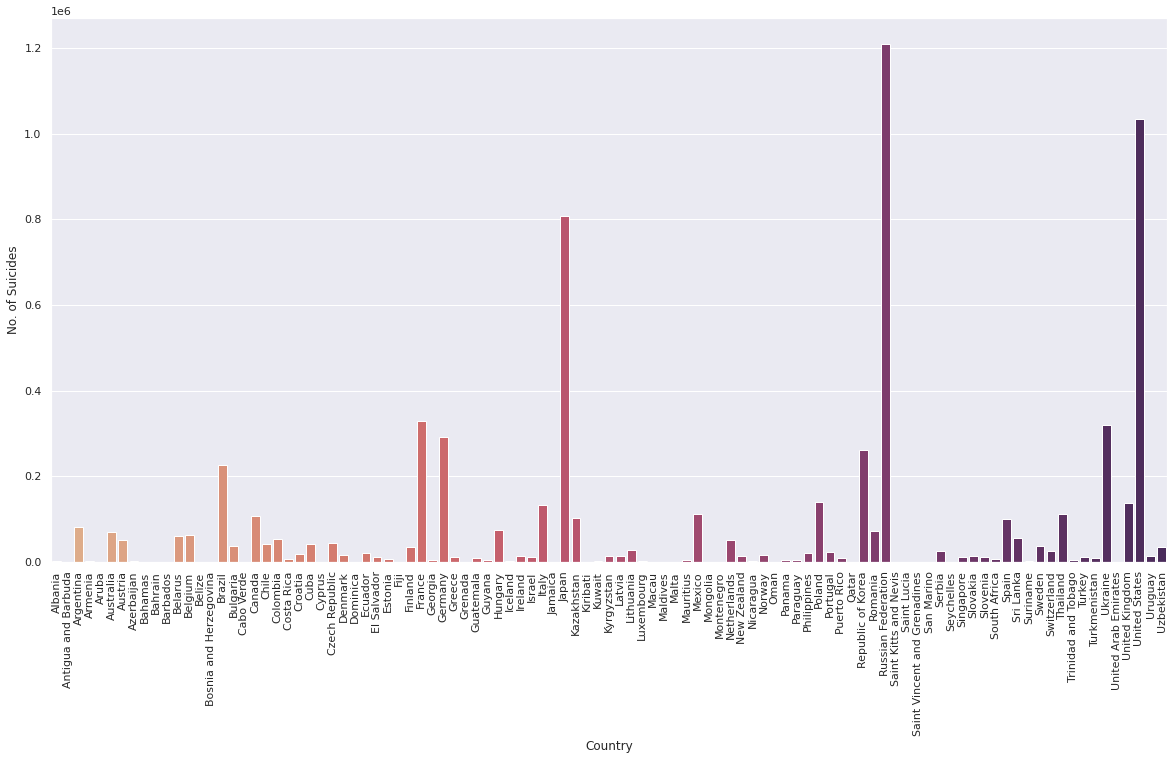

In [ ]:
dTf=pd.read_csv('master.csv')
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
sucide_coun = pd.DataFrame(dTf['suicides_no'].groupby(dTf['country']).sum().reset_index().sort_values(by='country', ascending=True))
x=sucide_coun["country"]
y= sucide_coun['suicides_no'];
sns.barplot(x=x, y=y, palette="flare")

plt.xlabel("Country")
plt.ylabel("No. of Suicides")
plt.xticks(rotation=90)

TOP 10 COUNTRIES

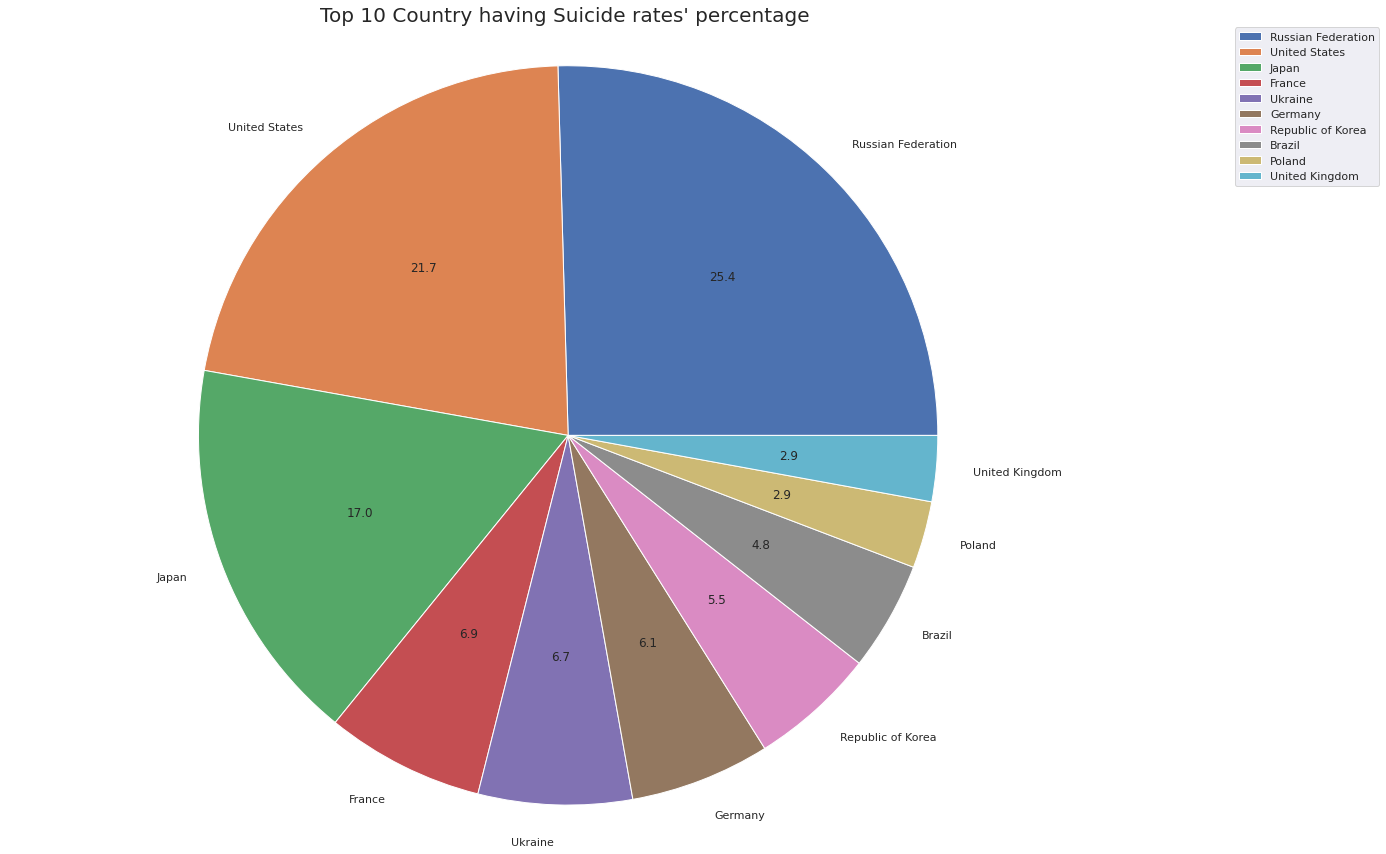

In [ ]:

dfcountry = df.groupby('country')
pdConcatOverall=pd.DataFrame()
for each,value in dfcountry:
    k= pd.DataFrame(pd.Series(int(np.sum(value['suicides_no']))),columns=['Total_Suicide_Count'])
    #display(k)
    country = pd.DataFrame(pd.Series(str(each)),columns=['Country'])
    #display(country)
    pdConcat= pd.concat([country,k],axis=1)
    #display(pdConcat)
    pdConcatOverall =pd.concat([pdConcatOverall,pdConcat],ignore_index=True)
#print(type(pdConcatOverall))
pdConcatOverall.sort_values(by=['Total_Suicide_Count'],ascending=False,inplace=True)
#display(pdConcatOverall)
plt.figure(figsize=(20,15))
plt.pie(x=pdConcatOverall['Total_Suicide_Count'][0:10],labels=pdConcatOverall['Country'][0:10],autopct='%.1f')
# CRKle = plt.Circle((0,0),0.65,fc='white',linewidth=1.5,color='black')
# x=plt.gcf()
# x.gca().add_artist(CRKle)
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
plt.axis('equal')
plt.title('Top 10 Country having Suicide rates\' percentage',fontsize=20)
plt.show()

BOTTOM 10 COUNTRIES

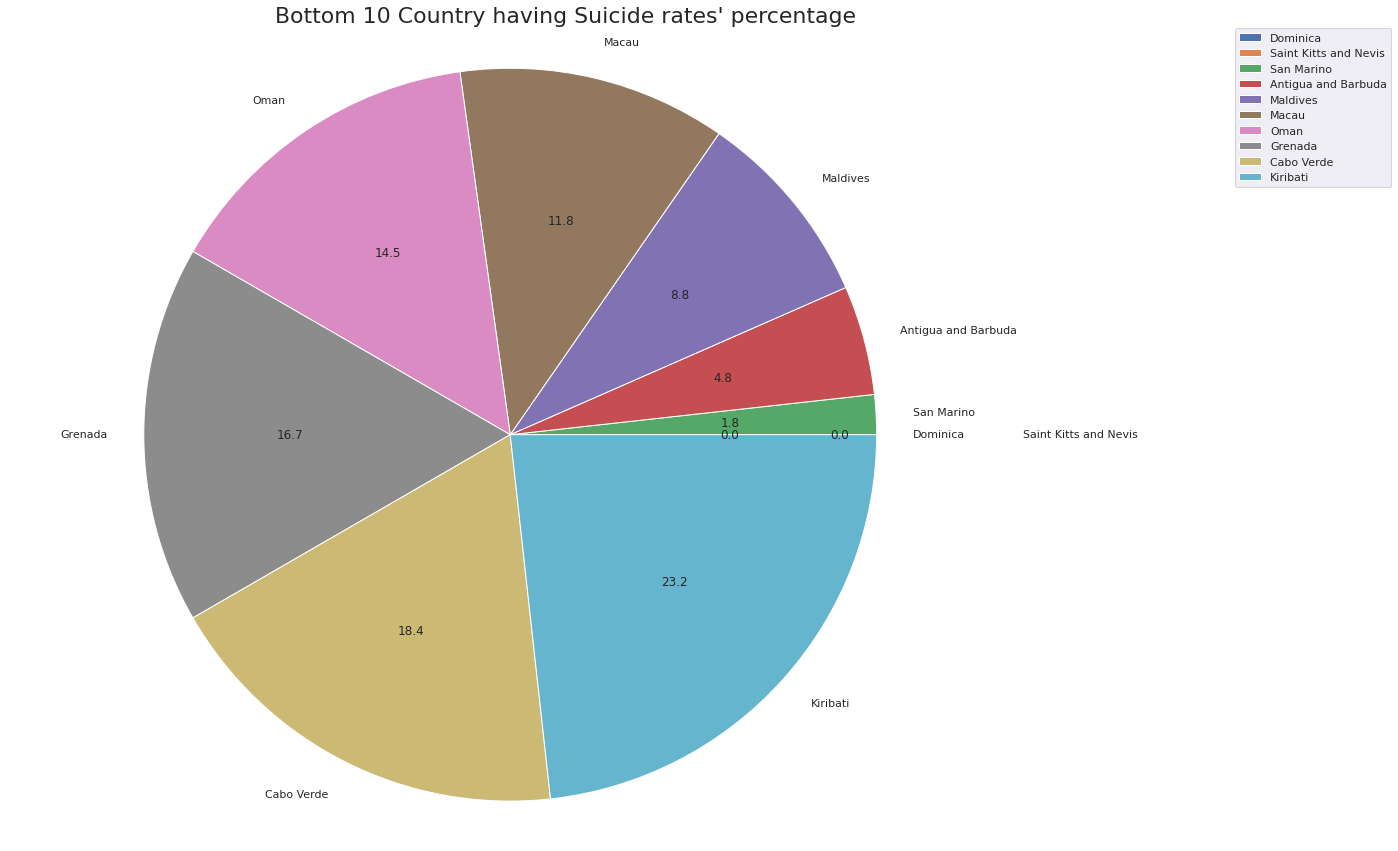

In [ ]:

dfcountry = df.groupby('country')
pdConcatOverall=pd.DataFrame()
for each,value in dfcountry:
    k= pd.DataFrame(pd.Series(int(np.sum(value['suicides_no']))),columns=['Total_Suicide_Count'])
    #display(k)
    country = pd.DataFrame(pd.Series(str(each)),columns=['Country'])
    #display(country)
    pdConcat= pd.concat([country,k],axis=1)
    #display(pdConcat)
    pdConcatOverall =pd.concat([pdConcatOverall,pdConcat],ignore_index=True)
#print(type(pdConcatOverall))
explode  = (0, 0.3, 0, 0, 0, 0,0, 0, 0, 0)
pdConcatOverall.sort_values(by=['Total_Suicide_Count'],ascending=True,inplace=True)
#display(pdConcatOverall)
plt.figure(figsize=(20,15))
plt.pie(x=pdConcatOverall['Total_Suicide_Count'][0:10],labels=pdConcatOverall['Country'][0:10],explode=explode,autopct='%.1f')
# CRKle = plt.Circle((0,0),0.65,fc='white',linewidth=1.5,color='black')
# x=plt.gcf()
# x.gca().add_artist(CRKle)
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
plt.axis('equal')
plt.title('Bottom 10 Country having Suicide rates\' percentage',fontsize=22)
plt.show()

CONTINENT WISE SUICIDES

In [ ]:
!pip install pycountry_convert

     |████████████████████████████████| 10.1MB 6.0MB/s 
     |████████████████████████████████| 235kB 41.9MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746865 sha256=472aecda76f5934c97d006b5823ec1943d8808bf891308206a2129c3097dc022
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.3 which is incompatible.
ERROR: pytest-mock 3.3.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-cov 2.10.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.1

Text(0.5, 0, 'Generation')

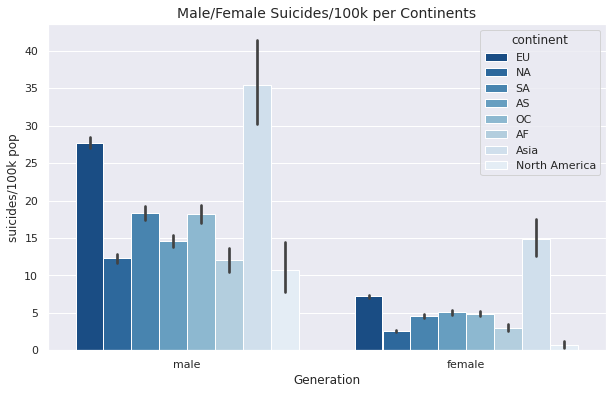

In [ ]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
#ageList = sorted(df.country.unique())
#ageList.remove('Republic of Korea')
#ageList.remove('Saint Vincent and Grenadines')
continents = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
df=pd.read_csv('master.csv')
continent=list()
#countries = ageList["country"]
for country in df["country"]:
  if country=='Republic of Korea':
    continent.append('Asia')
  elif country=='Saint Vincent and Grenadines':
    continent.append('North America')
  else:
    continent.append(country_alpha2_to_continent_code(country_name_to_country_alpha2(country)))
df['continent']=continent
# print(df)
fig = plt.figure(figsize=(10,6))
plt.title('Male/Female Suicides/100k per Continents', fontsize=14)
sns.barplot(data =df, x='sex',y='suicides/100k pop', hue='continent',palette='Blues_r')
plt.xlabel('Generation', fontsize=12)


YEAR WISE SUICIDES

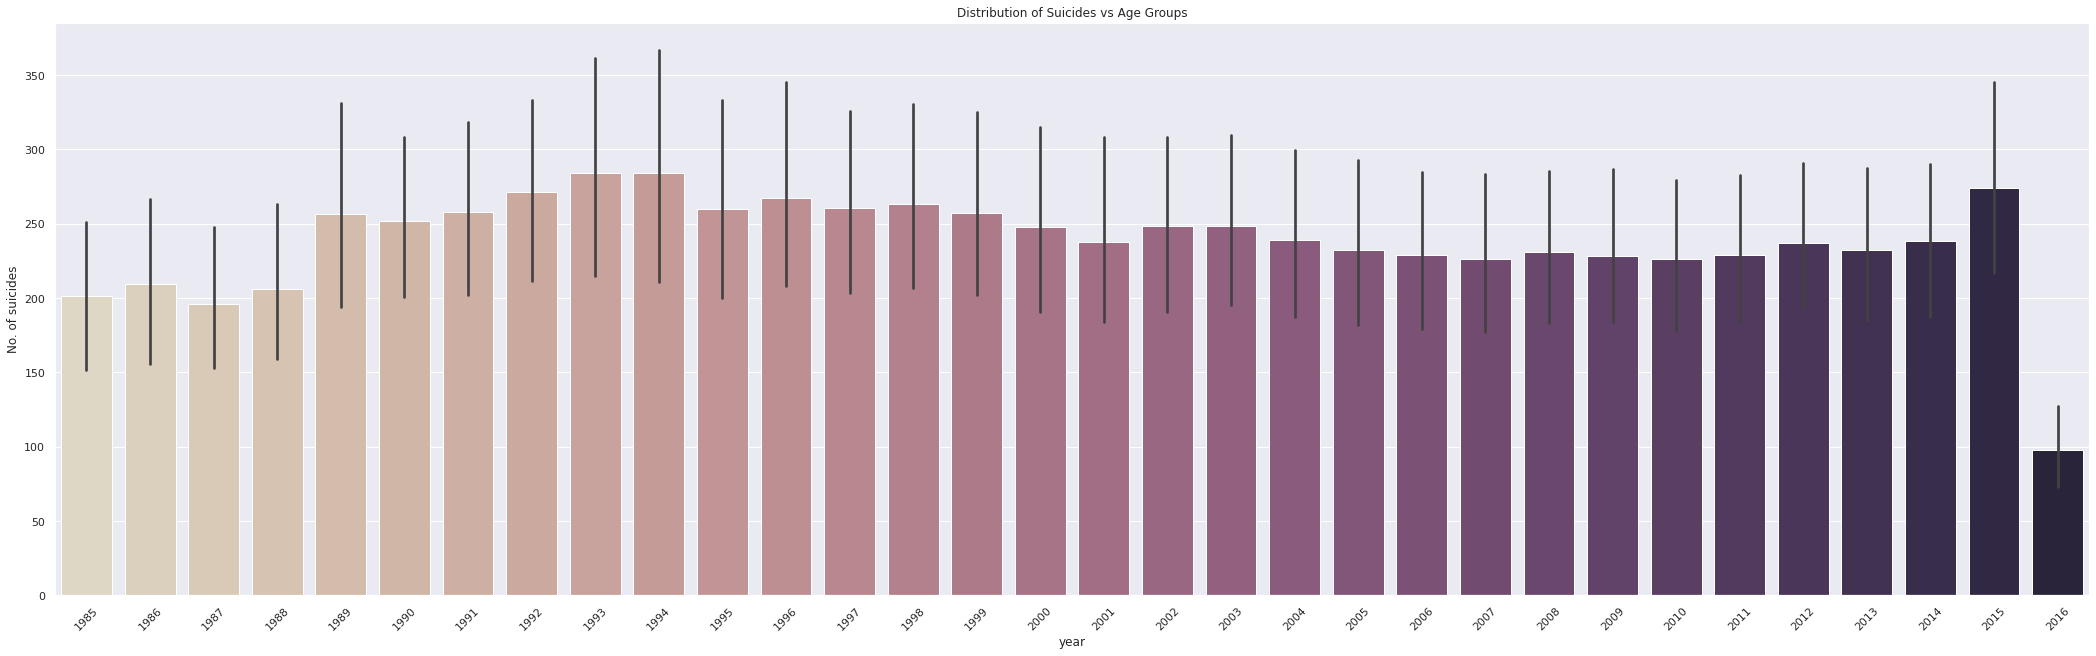

In [ ]:
SuiSum = pd.DataFrame(df['suicides_no'].groupby(df['year']).sum())
MostContYear = SuiSum
fig = plt.figure(figsize=(30,10))
plt.title('Distribution of Suicides vs Age Groups')

sns.set(font_scale=3)
sns.barplot(y=df['suicides_no'],x=df['year'],data=MostContYear,palette='ch:s=-.2,r=.6');
plt.ylabel('No. of suicides')
plt.xticks(rotation=45)
plt.tight_layout()

YEAR WISE SUICIDES/100K

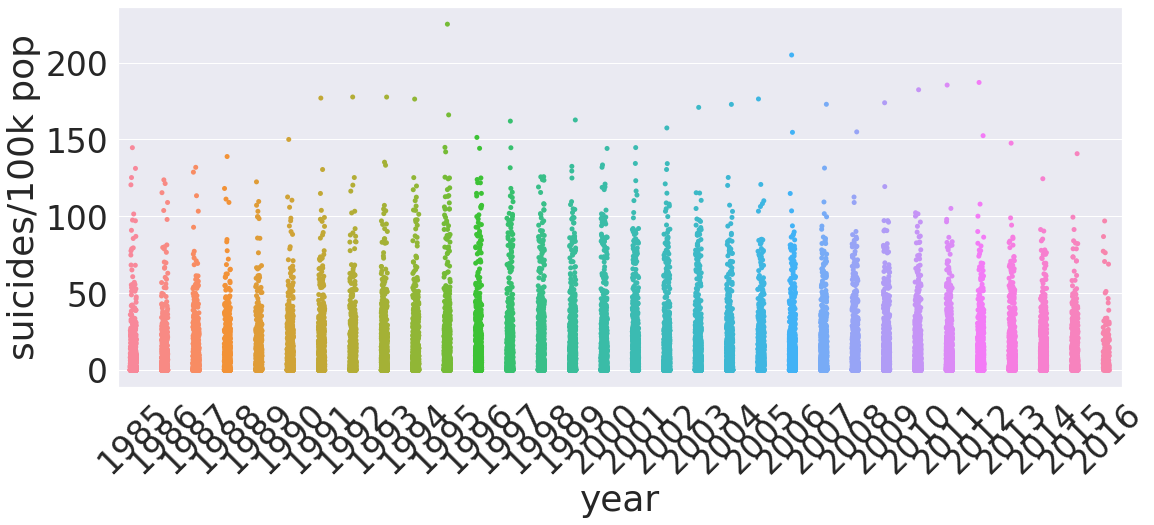

In [ ]:
plt.figure(figsize=(18,7))
sns.stripplot(x="year",y='suicides/100k pop',data=df)
plt.xticks(rotation=45)
plt.show()

POPULATION VS GDP

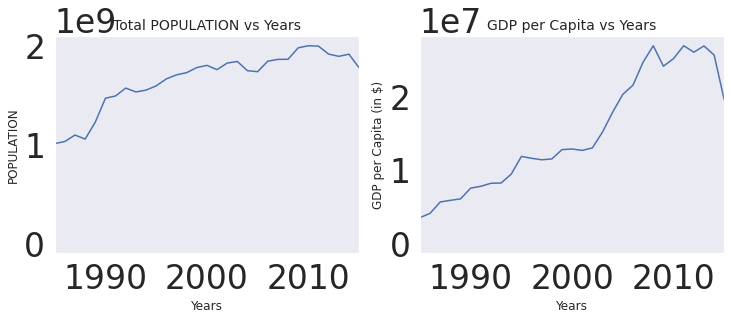

In [ ]:
YRS = sorted(df.year.unique()-1)  # not including 2016 data
POPULATION = []    # population
GDC = []    # gdp_per_capita ($)
SUI = []    # suicides_no
SUR = []    # suicides/100k pop

for year in sorted(YRS):
    POPULATION.append(df[df['year']==year]['population'].sum())
    GDC.append(df[df['year']==year]['gdp_per_capita ($)'].sum())
    SUI.append(df[df['year']==year]['suicides_no'].sum())
    SUR.append(df[df['year']==year]['suicides/100k pop'].sum())

#  plot population and gdp_per_capita ($), 1985-2015
fig = plt.figure(figsize=(12,4))
fig.add_subplot(121)
plt.title('Total POPULATION vs Years', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('POPULATION', fontsize=12)
plt.axis('auto')
plt.xlim(1985,2015)
plt.grid();
plt.plot(YRS,POPULATION)
fig.add_subplot(122)
plt.title('GDP per Capita vs Years', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('GDP per Capita (in $)', fontsize=12)
plt.xlim(1985,2015)
plt.grid();
plt.plot(YRS,GDC)
plt.show()


Comparion between population and suicides

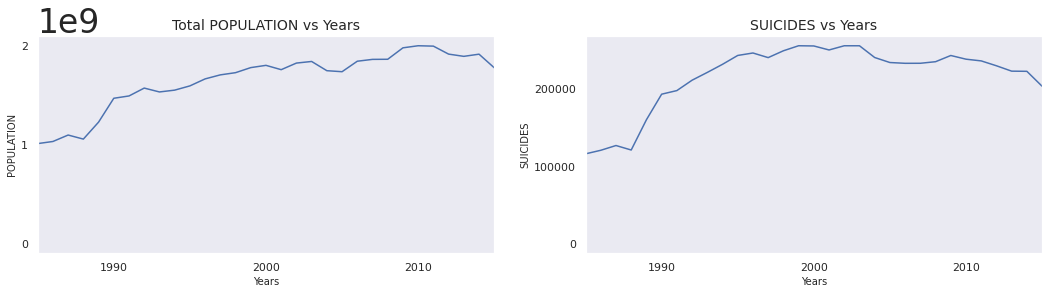

In [ ]:

fig = plt.figure(figsize=(18,4))
fig.add_subplot(121)
plt.title('Total POPULATION vs Years', fontsize=14)
plt.xlabel('Years', fontsize=10)
plt.ylabel('POPULATION', fontsize=10)
plt.axis('auto')
plt.xlim(1985,2015)
plt.grid();
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.plot(YRS,POPULATION)
fig.add_subplot(122)
plt.title('SUICIDES vs Years', fontsize=14)
plt.xlabel('Years', fontsize=10)
plt.ylabel('SUICIDES', fontsize=10)
plt.xlim(1985,2015)
plt.grid();
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.plot(YRS,SUI)
plt.show()

suicides vs gdp

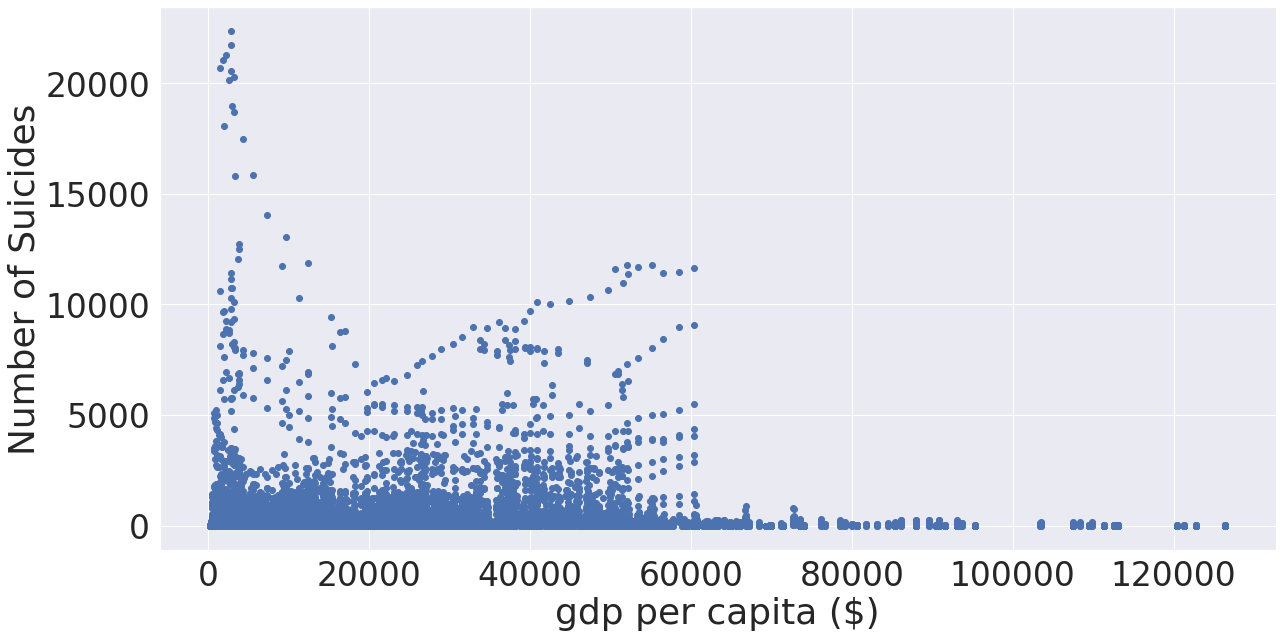

<Figure size 360x360 with 0 Axes>

In [ ]:
x = df['gdp_per_capita ($)']
y = df['suicides_no']
plt.xlabel("gdp per capita ($)")
plt.ylabel("Number of Suicides")
plt.scatter(x, y)
plt.figure(figsize=(5,5))
plt.show()

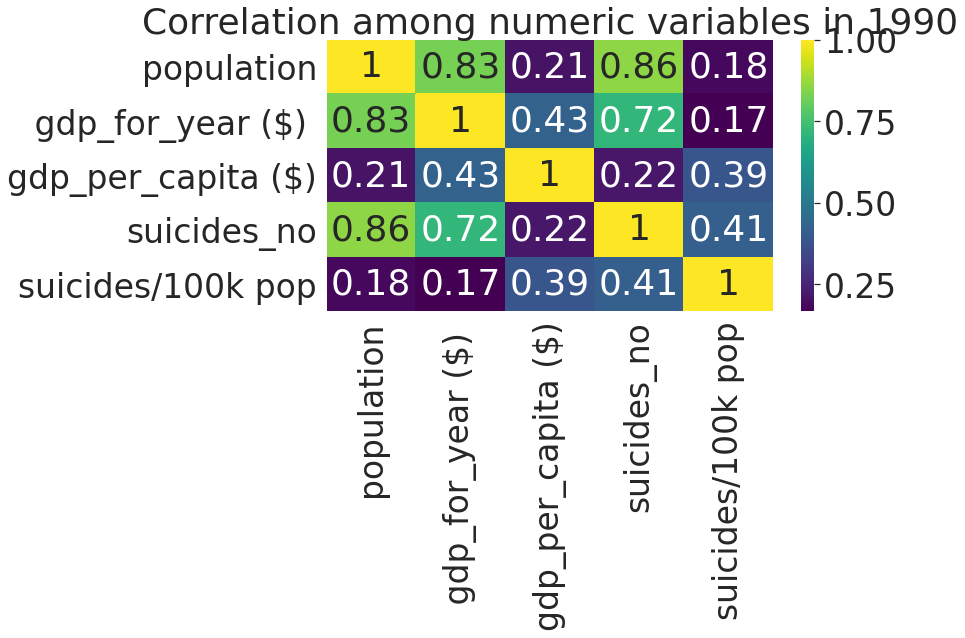

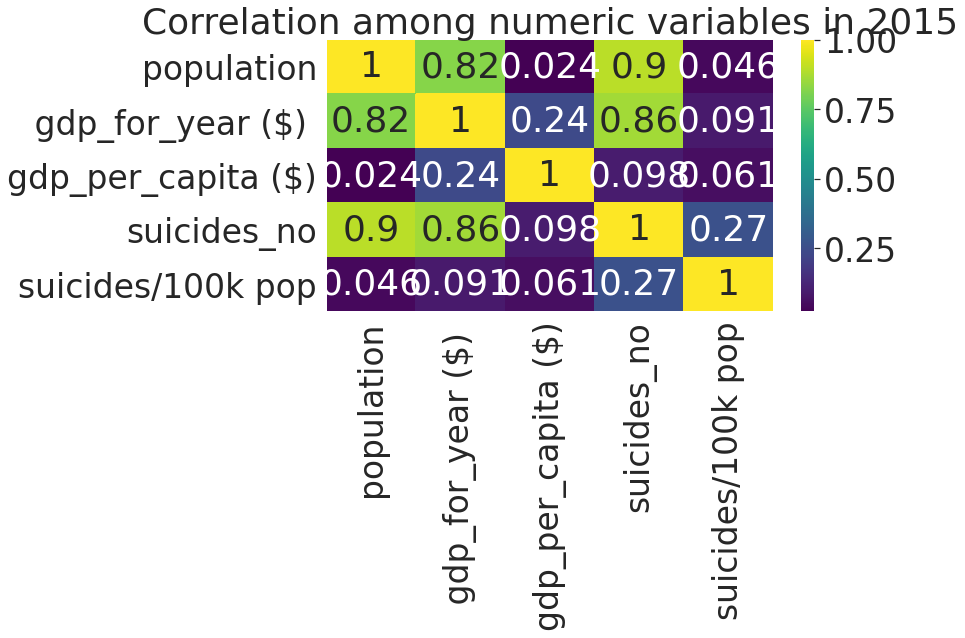

In [ ]:
def correlationPlot(data, year):

    dtf = df[df["year"] == year].drop(columns = "year").copy()
    sns.heatmap(
    dtf.groupby("country").agg("sum").corr(), cmap = "viridis", annot = True)
    plt.title("Correlation among numeric variables in {}".format(year))
    plt.show();

plt.figure(figsize= (10, 5))
correlationPlot(df, 1990)
plt.figure(figsize= (10, 5))
correlationPlot(df, 2015)

COMPLETE CORRELATION

suicides/100k pop     1.000000
suicides_no           0.306604
 gdp_for_year ($)     0.025240
population            0.008285
gdp_per_capita ($)    0.001785
year                 -0.039037
Name: suicides/100k pop, dtype: float64

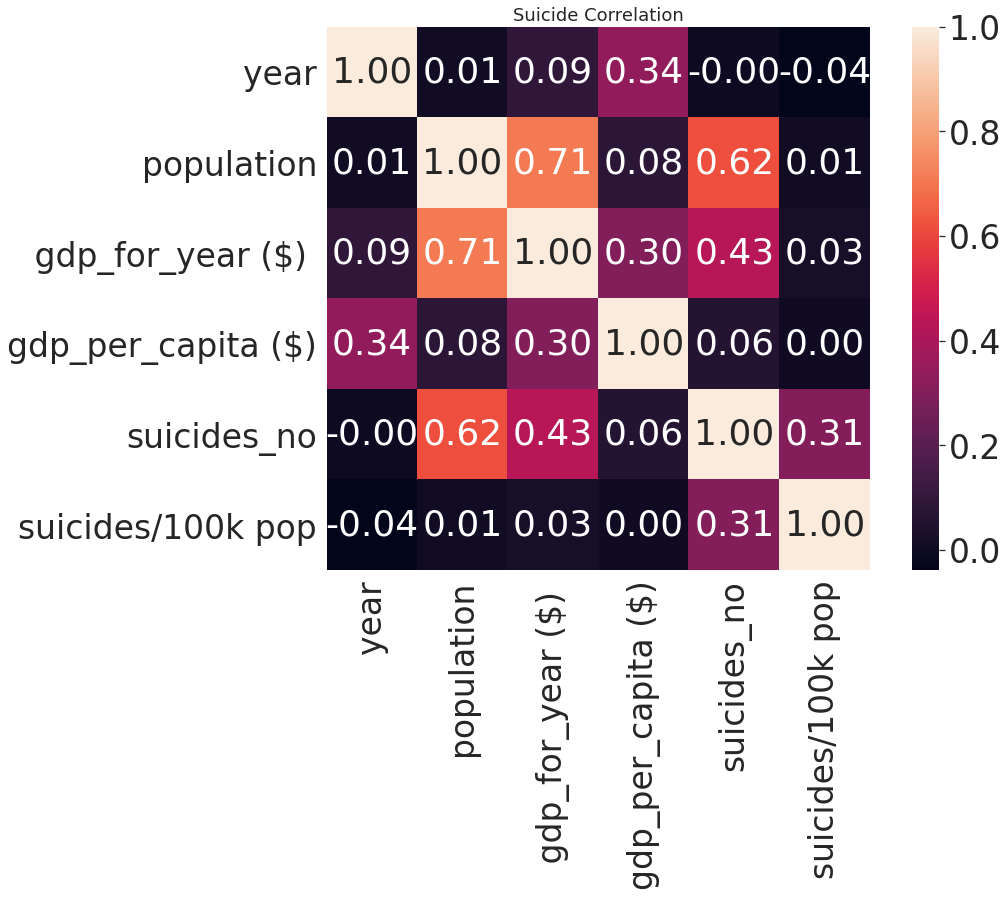

In [ ]:
dataCorr = dTf.corr()
plt.figure(figsize=(15,10))
plt.title('Suicide Correlation', fontsize=18)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'rocket')

dataCorr['suicides/100k pop'].sort_values(ascending=False)

COUNTRY WISE SUICIDES ON WORLD MAP

In [ ]:

from plotly.offline import init_notebook_mode, iplot

df=pd.read_csv('master.csv')
count_max_sui=pd.DataFrame(df.groupby('country')['suicides_no'].sum().reset_index())

count = [ dict(
        type = 'choropleth',
        locations = count_max_sui['country'],
        locationmode='country names',
        z = count_max_sui['suicides_no'],
        text = count_max_sui['country'],
        colorscale = 'PuBu',
        # autocolorscale = Tr,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(0,0,0)',
                width = 0.3
            ) ),
        colorbar = dict(
            autotick =False,
            title = 'Suicides Country-based'),
      ) ]
layout = dict(
    title = 'Suicides across the Globe',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)
fig = dict( data=count, layout=layout )
iplot( fig, validate=False, filename='d3-world-map' )

MODEL# New Section

DATA SPLIT


In [ ]:

df=pd.read_csv('master.csv')
array = df.values
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
le_sex=le1.fit(df.sex)
le_age=le2.fit(df.age)
le_country=le3.fit(df.country)

df.sex = le_sex.transform(df.sex) # female:0 , male:1
df.age = le_age.transform(df.age) # 15-24: 0, 25-34:1, 35-54:2 , 5-14:3, 55-74:4, 75+:5
df.country=le_country.transform(df.country)
df.rename(columns={"gdp_per_capita ($)": "gdp_capita"})
df.head()


,country,sex,age,country-year,year,population,gdp_for_year ($),gdp_per_capita ($),suicides_no,suicides/100k pop
0,0,1,0,Albania1987,1987,312900,2.156625e+09,796,21,6.71
1,0,1,2,Albania1987,1987,308000,2.156625e+09,796,16,5.19
2,0,0,0,Albania1987,1987,289700,2.156625e+09,796,14,4.83
3,0,1,5,Albania1987,1987,21800,2.156625e+09,796,1,4.59
4,0,1,1,Albania1987,1987,274300,2.156625e+09,796,9,3.28


DECISION TREE

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

df.rename(columns={" gdp_for_year ($) ":
                  "gdp_for_year", "gdp_per_capita ($)":
                  "gdp_per_capita"}, inplace=True)

X=df[['country','age','sex','population']]
y=df['suicides_no']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=434)
r=DecisionTreeRegressor()
r.fit(x_train,y_train)
y_pred2=r.predict(x_train)
y_pred_testing=r.predict(x_test)

dtesting=(r2_score(y_test, y_pred_testing))
dtraining=(r2_score(y_train, y_pred2))
print("Training score",dtraining)
print("Testing score",dtesting)

t=[[75,2,0,7138064]] #Russia, 35-54 yrs,female, population
t_pred=r.predict(t)
print(t_pred)


NameError: ignored

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randomforest=RandomForestRegressor()
randomforest.fit(x_train,y_train)
y_pred_testing=randomforest.predict(x_test)
y_pred2=randomforest.predict(x_train)
rtesting=(r2_score(y_test, y_pred_testing))
rtraining=(r2_score(y_train, y_pred2))
print("Training score",rtraining)
print("Testing score",rtesting)
t=[[75,2,1,7138064]] #Russia, 35+ yrs,male, population
t_pred=r.predict(t)
print(t_pred)


Training score 0.9926930164031355
Testing score 0.9695855405974692
[971.]


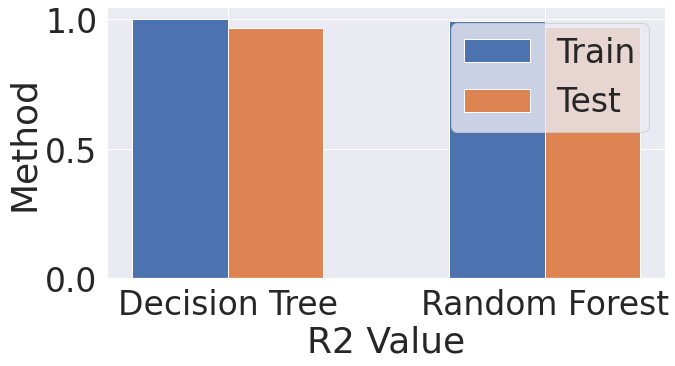

In [ ]:
N = 2

blue_bar = (dtraining, rtraining)
orange_bar = (dtesting,rtesting)

ind = np.arange(N)

plt.figure(figsize=(10,5))

width = 0.3

plt.bar(ind, blue_bar , width, label='Train')
plt.bar(ind + width, orange_bar, width, label='Test')

plt.xlabel('R2 Value')
plt.ylabel('Method')
plt.xticks(ind + width / 2, ('Decision Tree', 'Random Forest'))

plt.legend(loc='best')
plt.show()

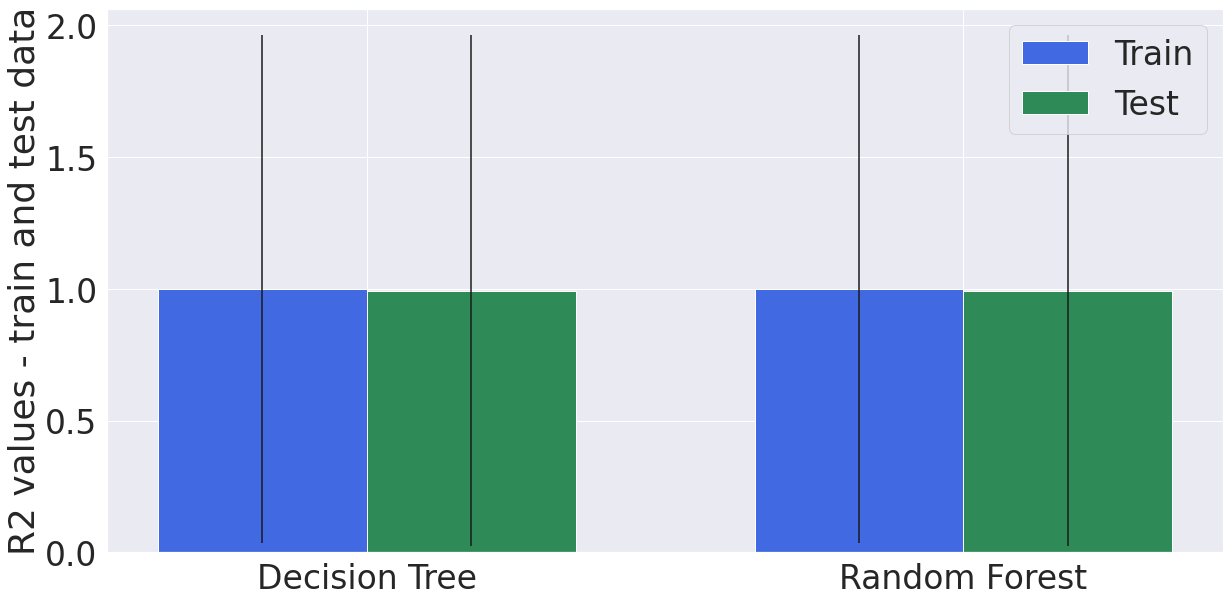

In [ ]:

N = 2
decTrain = dtraining
decTest =  dtesting
ind = np.arange(N)
width = 0.35      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, decTrain, width, color='royalblue',yerr=decTest)

randTrain = rtraining
randTest =   rtesting
rects2 = ax.bar(ind+width, randTrain, width, color='seagreen',yerr=randTest)
ax.set_ylabel('R2 values - train and test data')
ax.set_title('')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('Decision Tree', 'Random Forest') )

ax.legend( (rects1[0], rects2[0]), ('Train', 'Test') )

plt.show()


K-MEANS

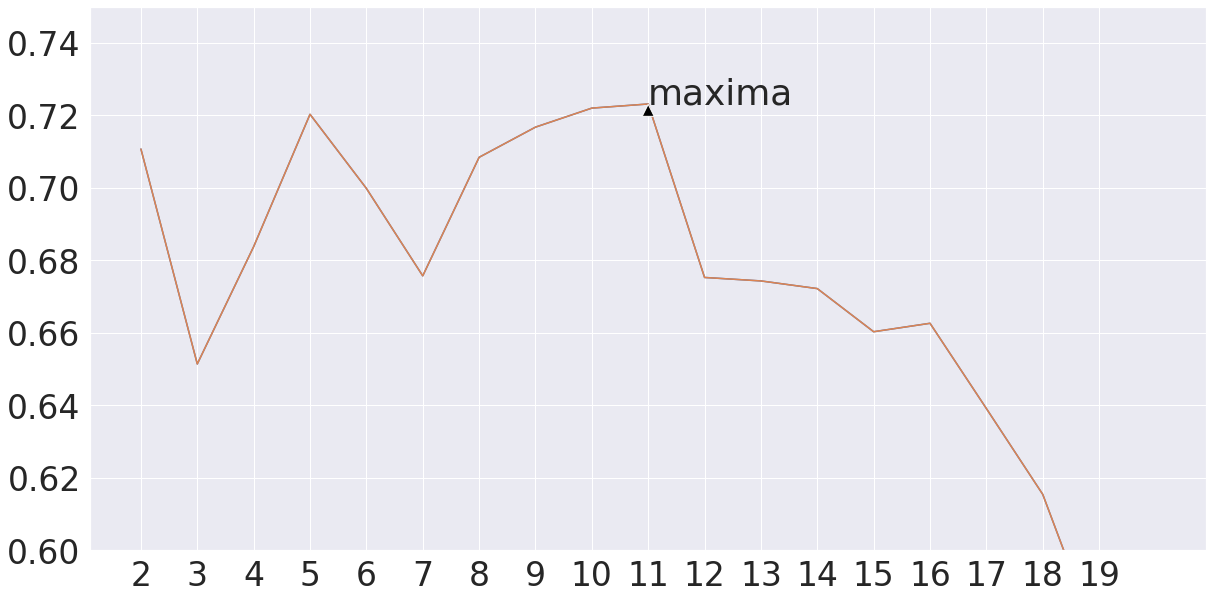

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

from sklearn.metrics import silhouette_score
df=pd.read_csv('master.csv')
array = df.values
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
le_sex=le1.fit(df.sex)
le_age=le2.fit(df.age)
le_country=le3.fit(df.country)

df.sex = le_sex.transform(df.sex) # female:0 , male:1
df.age = le_age.transform(df.age) # 15-24: 0, 25-34:1, 35-54:2 , 5-14:3, 55-74:4, 75+:5
df.country=le_country.transform(df.country)
df.rename(columns={"gdp_per_capita ($)": "gdp_capita"})
a=[]
x = df.drop(['suicides_no','country-year'], axis=True)
y = df['suicides_no']
for i in range(2, 21):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(x)#model train
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
      n_clusters=i, n_init=10, n_jobs=1, precompute_distances='auto',
      random_state=0, tol=0.0001, verbose=0)
  y_kmeans = kmeans.predict(x)
  x, y_kmeans = make_blobs(n_samples=600, centers=i, cluster_std=0.60, random_state=0)
  # fig = plt.figure()
  # ax = Axes3D(fig)
  # ax.scatter(x[:,0], x[:,1], c=y_kmeans, cmap='cool')
  a.append(silhouette_score(x, y_kmeans))
b=range(2,21)
fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot(b, a)

ymax = max(a)
xpos = a.index(ymax)
xmax = b[xpos]
ax.annotate('maxima', xy=(xmax, ymax),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.set_ylim(0.6,0.75)
plt.xticks(np.arange(2,20,1))
plt.plot(b, a)

